### Support Vector Machine
<hr>

In [2]:
# Preamble: Import libraries
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn import svm

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
# Reference http://scikit-learn.org/stable/modules/svm.html

In [3]:
# Replace categoricals and boolean variables in data frame
def transform_df(df):
    df =df.drop(df.columns[0],axis=1) # drop panda indexing column
    
    #df= df.drop('Over18',axis=1)
    
    # One Hot encoding for categorical variables
    categoricals = ['BusinessTravel','Department', 'EducationField','JobRole','MaritalStatus']
    for item in categoricals:
        dummy = pd.get_dummies(df[item], prefix=item)
        df = df.join(dummy.loc[:, :])
        df = df.drop(item, axis=1)
        
    #Transform boolean values into numbers
    df['Attrition'] = df['Attrition'].map(lambda x: 0 if x == 'No' else 1)
    df['OverTime'] = df['OverTime'].map(lambda x: 0 if x == 'No' else 1)
    df['Gender'] = df['Gender'].map(lambda x: 0 if x== 'Female' else 1)
    df['Over18'] = df['Over18'].map(lambda x: 0 if x=='N' else 1)
    return df

In [4]:
# Normalize data before training the model
from sklearn.preprocessing import StandardScaler
empl = pd.read_csv("EmployeeIBMData.csv")
empl = transform_df(empl)
scaler = StandardScaler()
scaler.fit(empl)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
# Create training and test sets
train_set = pd.read_csv("trainEmployeeData.csv")
test_set = pd.read_csv("testEmployeeData.csv")

# Apply transformation
train_set = transform_df(train_set)
test_set = transform_df(test_set)

In [6]:
y_train = train_set['Attrition']
x_train = train_set.drop(['Attrition'], axis=1)
x_train = scaler.transform(x_train) #normalize
y_test = test_set['Attrition']
x_test = test_set.drop(['Attrition'], axis=1)
x_test = scaler.transform(x_test) #normalize

In [7]:
# Apply SVM Classifier
svmC = svm.SVC(kernel = 'linear');
svmC.fit(x_train,y_train);
svmC.predict(x_test)
print ("Linear SVM")
print("Training Accuracy: ", svmC.score(x_train, y_train))
print("Test Accuracy: ", svmC.score(x_test,y_test))

Linear SVM
Training Accuracy:  0.893707482993
Test Accuracy:  0.891156462585


In [123]:
# Apply SVM Classifier
svmC = svm.SVC(C = 1.3, kernel = 'poly');
svmC.fit(x_train,y_train);
svmC.predict(x_test)
print ("Poly SVM")
print("Training Accuracy: ", svmC.score(x_train, y_train))
print("Test Accuracy: ", svmC.score(x_test,y_test))

Poly SVM
Training Accuracy:  1.0
Test Accuracy:  0.792517006803


In [124]:
# Apply SVM Classifier
svmC = svm.SVC(kernel = 'rbf');
svmC.fit(x_train,y_train);
svmC.predict(x_test)
print ("RBF SVM")
print("Training Accuracy: ", svmC.score(x_train, y_train))
print("Test Accuracy: ", svmC.score(x_test,y_test))

RBF SVM
Training Accuracy:  0.920068027211
Test Accuracy:  0.850340136054


In [125]:
# Apply SVM Classifier
svmC = svm.SVC(C = 1.23, gamma = 0.006, kernel = 'rbf');
svmC.fit(x_train,y_train);
svmC.predict(x_test)
print ("RBF SVM, Params")
print("Training Accuracy: ", svmC.score(x_train, y_train))
print("Test Accuracy: ", svmC.score(x_test,y_test))

RBF SVM, Params
Training Accuracy:  0.884353741497
Test Accuracy:  0.860544217687


In [127]:
# Apply SVM Classifier
svmC = svm.SVC(kernel = 'sigmoid');
svmC.fit(x_train,y_train);
svmC.predict(x_test)
print ("Sigmoid SVM")
print("Training Accuracy: ", svmC.score(x_train, y_train))
print("Test Accuracy: ", svmC.score(x_test,y_test))

Sigmoid SVM
Training Accuracy:  0.837585034014
Test Accuracy:  0.843537414966


<hr>

In [8]:
# Apply SVM Classifier
svmC = svm.SVC(kernel = 'linear');
svmC.fit(x_train,y_train);
svmC.predict(x_test)
print ("Linear SVM")
print("Training Accuracy: ", svmC.score(x_train, y_train))
print("Test Accuracy: ", svmC.score(x_test,y_test))

Linear SVM
Training Accuracy:  0.893707482993
Test Accuracy:  0.891156462585


Age 0.00890220586911
DailyRate 0.0549314883343
DistanceFromHome 0.228261352234
Education 0.0582250527442
EmployeeCount 0.0
EmployeeNumber 0.0768384938833
EnvironmentSatisfaction 0.318875458428
Gender 0.101540985566
HourlyRate 0.0648041105492
JobInvolvement 0.309746492785
JobLevel 0.262025088937
JobSatisfaction 0.389416381681
MonthlyIncome 0.0486010079515
MonthlyRate 0.00443627633608
NumCompaniesWorked 0.347264826856
Over18 0.0
OverTime 0.640403229021
PercentSalaryHike 0.0529721134623
PerformanceRating 0.0304359420234
RelationshipSatisfaction 0.166041987503
StandardHours 0.0
StockOptionLevel 0.197676378504
TotalWorkingYears 0.524112788857
TrainingTimesLastYear 0.193218553162
WorkLifeBalance 0.194148269298
YearsAtCompany 0.379080560581
YearsInCurrentRole 0.275326054206
YearsSinceLastPromotion 0.371937826391
YearsWithCurrManager 0.349029726389
BusinessTravel_Non-Travel 0.146377043917
BusinessTravel_Travel_Frequently 0.189290977154
BusinessTravel_Travel_Rarely 0.0654550043855
Department_Hu

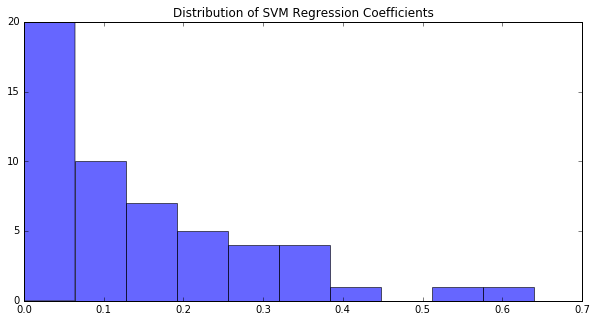

In [35]:
coef = [abs(item) for sublist in svmC.coef_ for item in sublist] #flatten model.coef_

feats = pd.read_csv("trainEmployeeData.csv")
feats = transform_df(feats)
feats = feats.drop(['Attrition'], axis=1)
plt.figure(figsize=(10,5))
plt.title("Distribution of SVM Regression Coefficients")
plt.hist(coef, alpha = 0.6);

for idx, val in enumerate(coef):
    print(feats.columns[idx],val)

In [36]:
# Very iterative way to rank features
unranked_features = [];
for idx, val in enumerate(coef):
    unranked_features.append([feats.columns[idx],val])

In [41]:
coef.sort()
ranked_features = [];
for r in coef:
    for u in unranked_features:
        if u[1] == r:
            ranked_features.append([u[0], r])

In [51]:
def showTop(n, coefficients):
    for i in range(len(coefficients) - 1,len(coefficients) - n - 1 , -1): 
        print(coefficients[i])
    return

In [52]:
showTop(5, ranked_features)

['OverTime', 0.6404032290207089]
['TotalWorkingYears', 0.52411278885668855]
['JobSatisfaction', 0.38941638168145748]
['YearsAtCompany', 0.37908056058055628]
['YearsSinceLastPromotion', 0.37193782639084316]


In [54]:
showTop(10, ranked_features)

['OverTime', 0.6404032290207089]
['TotalWorkingYears', 0.52411278885668855]
['JobSatisfaction', 0.38941638168145748]
['YearsAtCompany', 0.37908056058055628]
['YearsSinceLastPromotion', 0.37193782639084316]
['YearsWithCurrManager', 0.3490297263892681]
['NumCompaniesWorked', 0.34726482685638094]
['EnvironmentSatisfaction', 0.31887545842806375]
['JobInvolvement', 0.30974649278504979]
['YearsInCurrentRole', 0.27532605420599254]


In [55]:
showTop(20, ranked_features)

['OverTime', 0.6404032290207089]
['TotalWorkingYears', 0.52411278885668855]
['JobSatisfaction', 0.38941638168145748]
['YearsAtCompany', 0.37908056058055628]
['YearsSinceLastPromotion', 0.37193782639084316]
['YearsWithCurrManager', 0.3490297263892681]
['NumCompaniesWorked', 0.34726482685638094]
['EnvironmentSatisfaction', 0.31887545842806375]
['JobInvolvement', 0.30974649278504979]
['YearsInCurrentRole', 0.27532605420599254]
['JobLevel', 0.26202508893723897]
['DistanceFromHome', 0.22826135223404798]
['StockOptionLevel', 0.19767637850423436]
['JobRole_Sales Representative', 0.19743240239606497]
['WorkLifeBalance', 0.19414826929838325]
['TrainingTimesLastYear', 0.19321855316168068]
['BusinessTravel_Travel_Frequently', 0.18929097715448862]
['JobRole_Manufacturing Director', 0.18033184103882438]
['RelationshipSatisfaction', 0.16604198750271815]
['JobRole_Research Scientist', 0.15625356196592366]


What if numbers are different for job roles?

### Cross Validation for Parameter Selection

In [11]:
ranked_features

[['Age', -0.0089022058691057282],
 ['DailyRate', -0.054931488334296119],
 ['DistanceFromHome', 0.22826135223404798],
 ['Education', 0.058225052744228734],
 ['EmployeeCount', 0.0],
 ['EmployeeNumber', -0.076838493883298165],
 ['EnvironmentSatisfaction', -0.31887545842806375],
 ['Gender', 0.10154098556555402],
 ['HourlyRate', 0.064804110549193772],
 ['JobInvolvement', -0.30974649278504979],
 ['JobLevel', -0.26202508893723897],
 ['JobSatisfaction', -0.38941638168145748],
 ['MonthlyIncome', 0.048601007951547759],
 ['MonthlyRate', -0.0044362763360845103],
 ['NumCompaniesWorked', 0.34726482685638094],
 ['Over18', 0.0],
 ['OverTime', 0.6404032290207089],
 ['PercentSalaryHike', -0.052972113462257553],
 ['PerformanceRating', 0.030435942023445572],
 ['RelationshipSatisfaction', -0.16604198750271815],
 ['StandardHours', 0.0],
 ['StockOptionLevel', -0.19767637850423436],
 ['TotalWorkingYears', -0.52411278885668855],
 ['TrainingTimesLastYear', -0.19321855316168068],
 ['WorkLifeBalance', -0.19414826

In [56]:
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
clf.fit(X_train, y_train)